# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


Плагиат будет караться полной отменой баллов за лабораторную. 


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

Сделано внутри шаблона лабораторной работы внутри jupiter из-под pycharm

@abardzak - Бардзак Антон, ПГНИУ 2 курс

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [454]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [455]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
def coin(size=1):
    shape = size if isinstance(size, tuple) else (size,)
    return np.random.randint(0, 2, size=shape)

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [456]:
coin(size=10)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [457]:
def uniform(size=1, precision=50):
    shape = size if isinstance(size, tuple) else (size,)
    binary_representation = coin(size=(*shape, precision))
    powers_of_two = 0.5 ** np.arange(1, precision + 1)
    return np.dot(binary_representation, powers_of_two)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

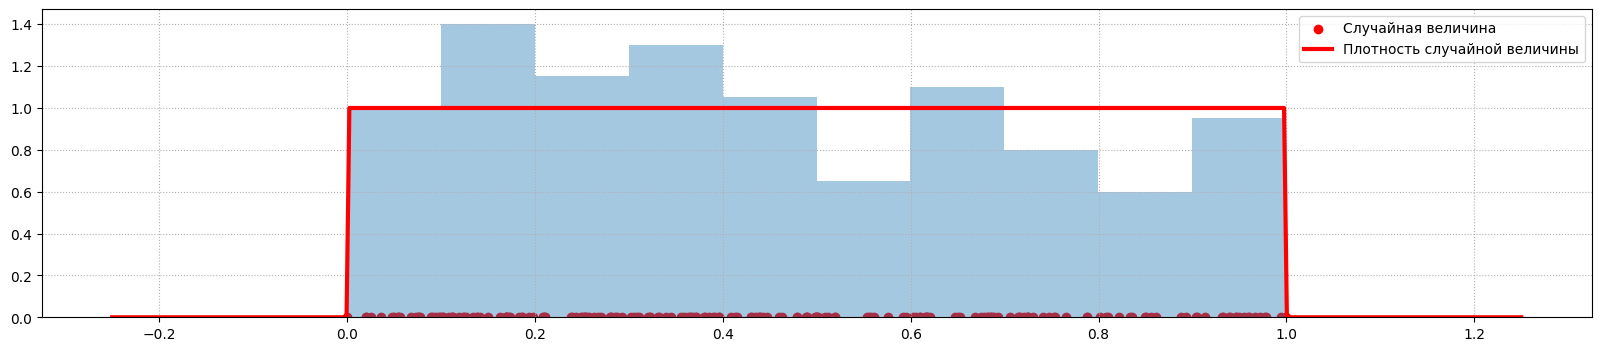

In [458]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)
plt.figure(figsize = (20, 4))
plt.scatter(sample, np.zeros(size), label = "Случайная величина", color = 'red')
plt.hist(sample, bins = 10, density = True, alpha = 0.4)
plt.plot(grid, sps.uniform.pdf(grid), color = 'red', linewidth = 3, label = "Плотность случайной величины")
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

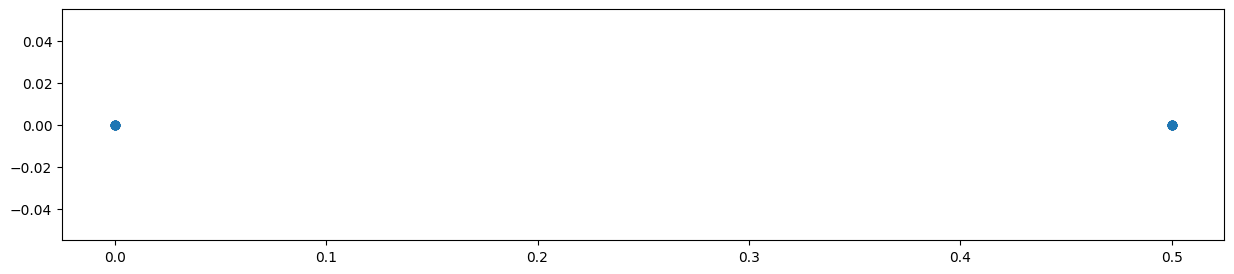

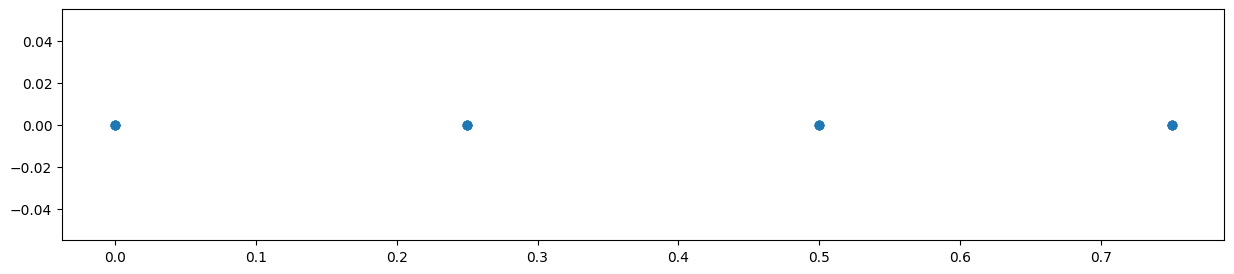

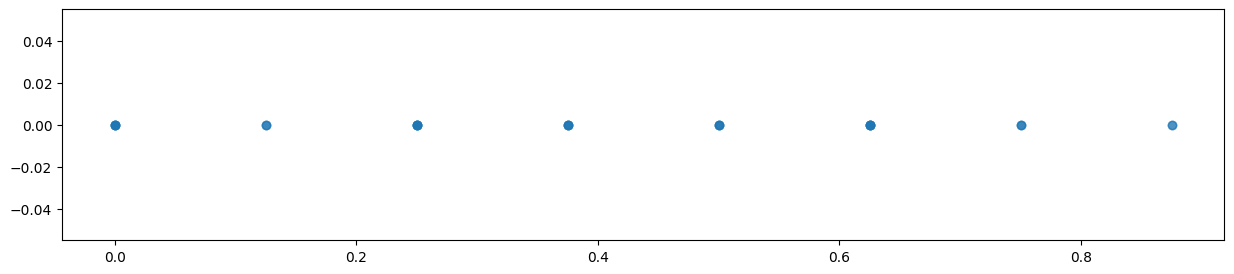

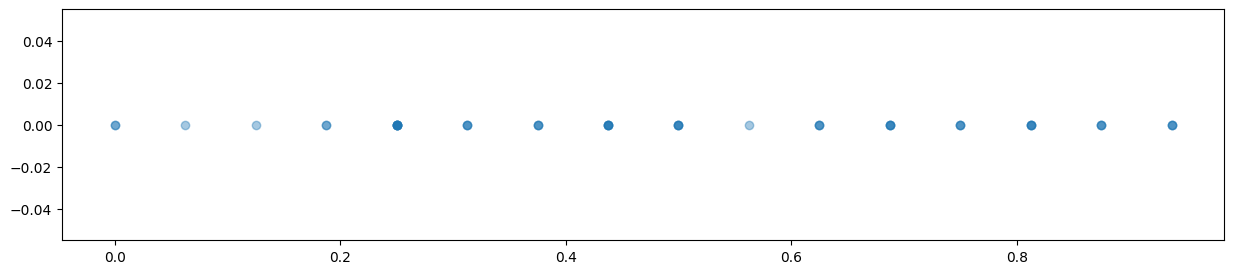

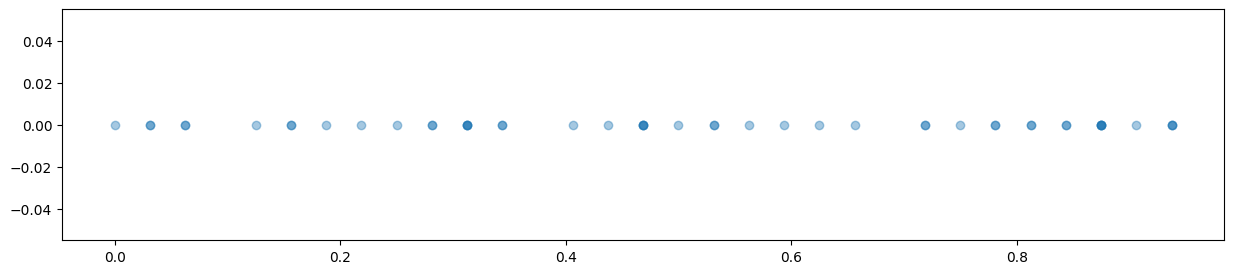

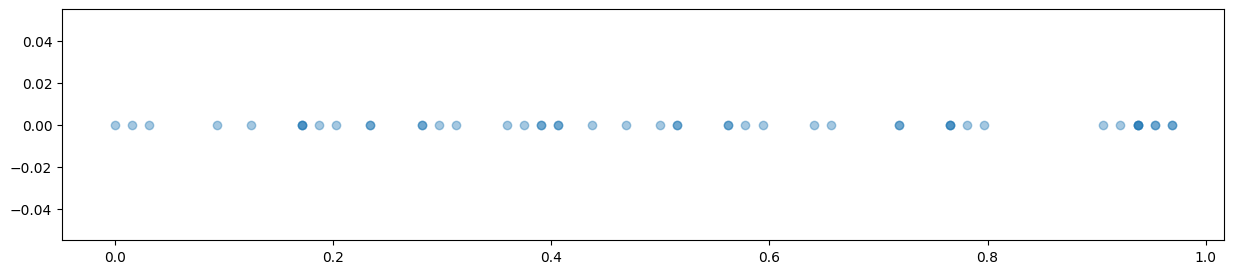

In [459]:
for i, precision in enumerate([1, 2, 3, 4, 5, 6]):
    plt.figure(figsize = (15, 3))
    plt.scatter(
        uniform(50, precision),
        np.zeros(50),
        alpha = 0.4
    )
    plt.show()



**Вывод:**

Метод генерации через функцию генерирующую бросок монетки работает, на графиках мы видим корректную информацию о плотности которая равна единице и исходах генерации

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [460]:
def normal(size=1, loc=0, scale=1, precision=30):
    shape = size if isinstance(size, tuple) else (size,)
    uniform1 = uniform(size=(*shape, 2), precision=precision)
    xi, eta = uniform1[..., 0], uniform1[..., 1]
    z0 = np.cos(2 * np.pi * xi) * np.sqrt(-2 * np.log(eta))
    z1 = np.sin(2 * np.pi * xi) * np.sqrt(-2 * np.log(eta))
    normal_samples = np.stack((z0, z1), axis=-1).reshape(*shape, -1)
    normal_samples = normal_samples[..., :np.prod(shape)].reshape(shape)
    return loc + scale * normal_samples

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

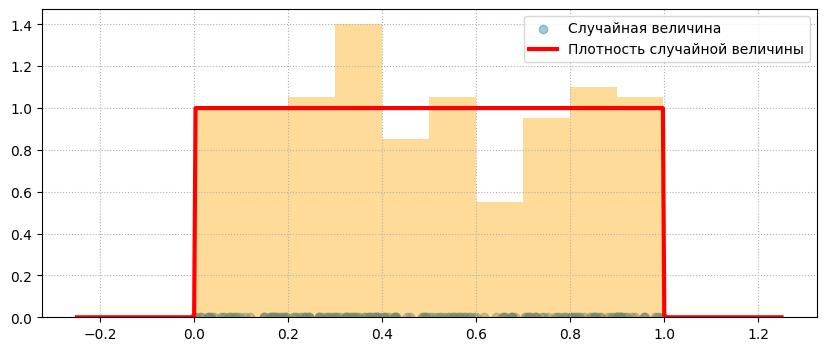

In [461]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)
plt.figure(figsize = (10, 4))
plt.scatter(sample, np.zeros(size), alpha = 0.4, label = "Случайная величина")
plt.hist(sample, bins = 10, density = True, alpha = 0.4, color = "orange")
plt.plot(grid, sps.uniform.pdf(grid), color = 'red', linewidth = 3, label = "Плотность случайной величины")
plt.legend()
plt.grid(ls=':')
plt.show()

Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$. 
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [462]:
def expon(size=1, lambd=1, precision=30):
    uniform_samples = uniform(size=size, precision=precision)
    return -np.log(1 - uniform_samples) / lambd
expon(10)

array([0.15079367, 0.4659305 , 0.12364691, 0.10150411, 0.02983838,
       0.32543044, 0.56080191, 2.18850975, 1.19803418, 2.07158589])

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

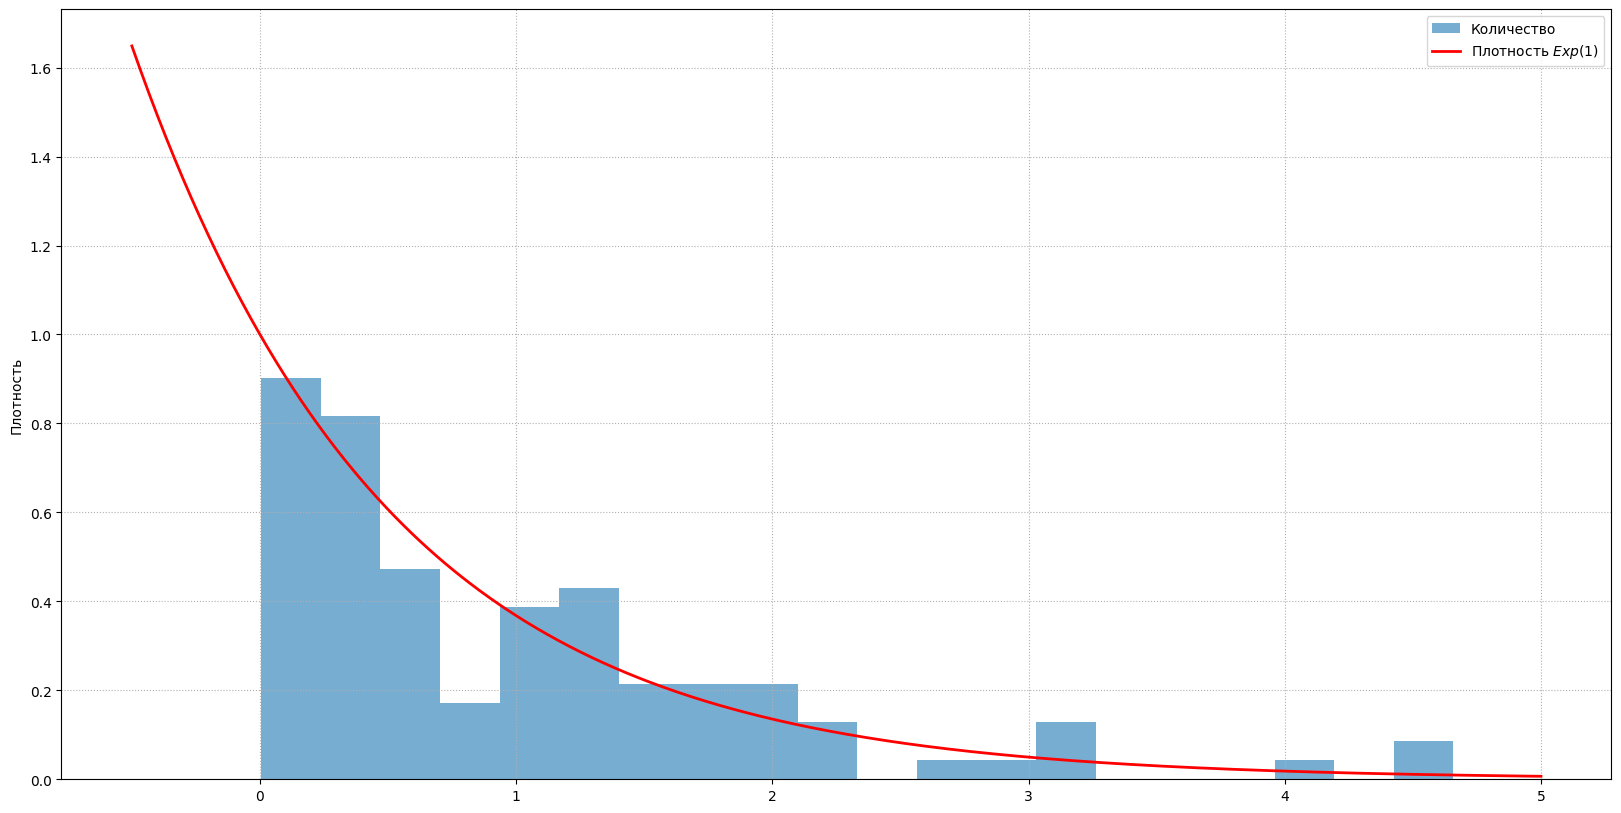

In [463]:
sample_size = 100
exp_sample = expon(size=sample_size, lambd=1, precision=30)

x = np.linspace(-0.5, 5, 500)
manual_pdf = np.exp(-x)  # f(x) = e^(-x)
plt.figure(figsize=(20, 10))
plt.hist(exp_sample, bins=20, density=True, alpha=0.6, label="Количество")
plt.plot(x, manual_pdf, label="Плотность $Exp(1)$", color='red', linewidth=2)
plt.ylabel("Плотность")
plt.grid(ls=":")
plt.legend()
plt.show()

**Вывод по задаче:**

На графике мы видим корректный график экспоненциального распределения, а значит способ генерации корректен.

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [464]:
def matrix_multiplication(A, B):
    A = A[:, :, None]
    B = B[None, :, :]
    return np.sum(A * B, axis=1)


Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [465]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

np.float64(9.103828801926284e-14)

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)\

да, грешили

In [466]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [467]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: total: 141 ms
Wall time: 137 ms
CPU times: total: 0 ns
Wall time: 1.02 ms
CPU times: total: 0 ns
Wall time: 2 ms
CPU times: total: 20.7 s
Wall time: 18.6 s
CPU times: total: 0 ns
Wall time: 9.74 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [468]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.

    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    # Преобразование матриц для вычисления в трех изменериях
    A = A[:, :, None]
    B = B[None, :, :]
    # Векторное умножение numpy
    C = np.sum(A * B, axis=1)
    # Возврат значения
    return C

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [469]:
def brown(sigma, T, num_intervals, dimension, num_particles):
    delta_t = T / num_intervals
    increments = np.random.normal(0, np.sqrt(sigma**2 * delta_t), size=(num_particles, dimension, num_intervals))
    result = np.cumsum(increments, axis=2)
    return result

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

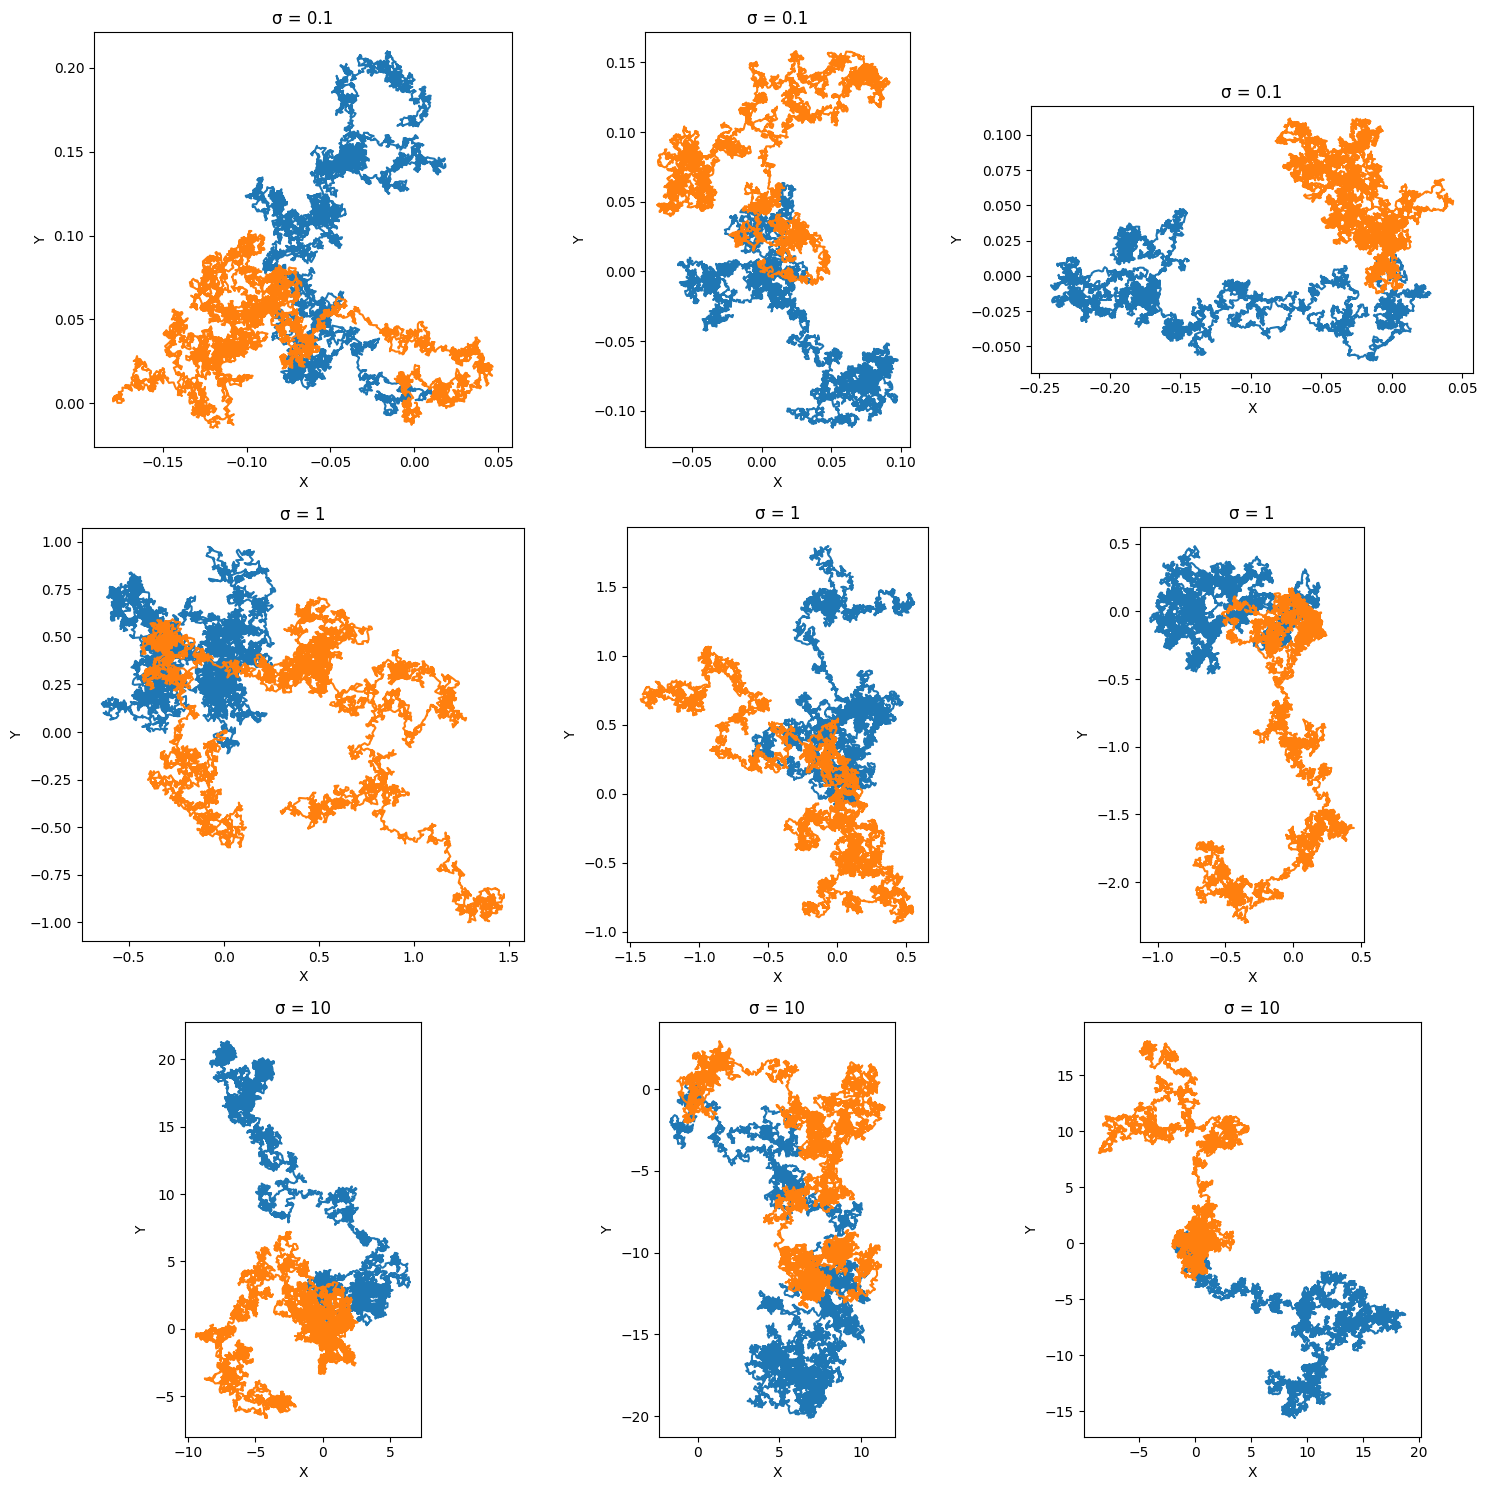

In [489]:
sigmas = [0.1, 1, 10]
fig, axes = plt.subplots(len(sigmas), 3, figsize=(15, 5*len(sigmas)))
for i, sigma in enumerate(sigmas):
    trajectories = brown(sigma, 1, 10000, 2, 6)
    for j in range(6):
        ax = axes[i, j // 2] if len(sigmas)>1 else axes[j//2]
        ax.plot(trajectories[j, 0], trajectories[j, 1])
        ax.set_title(f"σ = {sigma}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_aspect('equal')
plt.tight_layout()
plt.show()

Как вид траектории зависит от $\sigma$?

При увеличении параметра сигма, расстояние которое проходит территория пространства на котором побывала частица увеличивается, дисперсия ее отклонений при этом не меняется.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

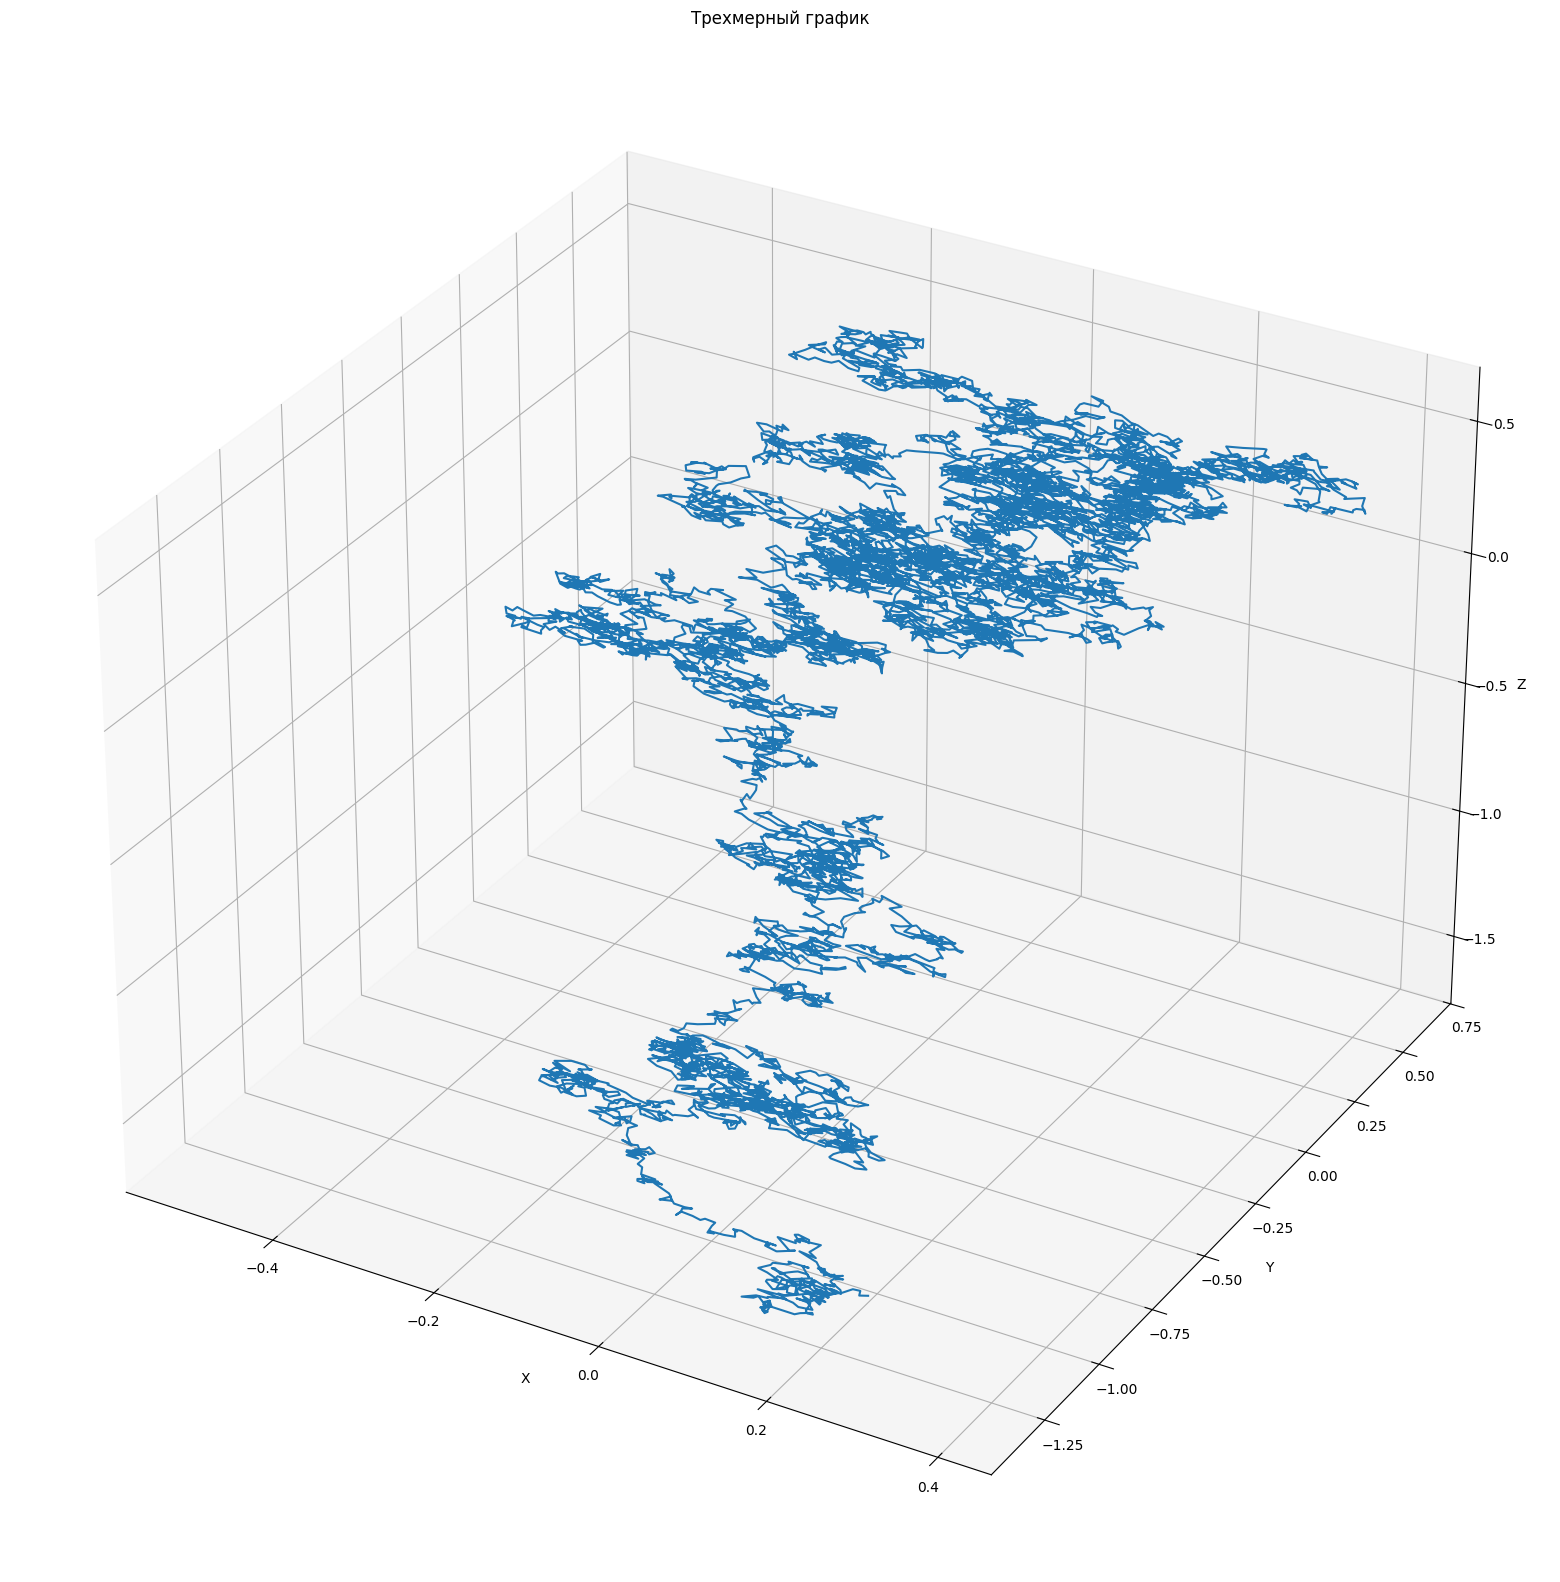

In [471]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
trajectory = brown(1, 1, 10000, 3, 1)[0]
ax.plot(trajectory[0], trajectory[1], trajectory[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Трехмерный график")
plt.show()


**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

In [472]:
def investigate_distance(dimensions, sigma_values, T_values, num_intervals=1000, num_trials=1000):
    results = {}
    for dim in dimensions:
        results[dim] = {}
        for sigma in sigma_values:
            results[dim][sigma] = {}
            for T in T_values:
                distances = []
                for _ in range(num_trials):
                    trajectory = brown(sigma, T, num_intervals, dim, 1)[0]
                    distance = np.linalg.norm(trajectory[:, -1])  # Расстояние в конце траектории
                    distances.append(distance)
                results[dim][sigma][T] = np.mean(distances)
    return results


# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [473]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

np.set_printoptions(precision=8, suppress=True)
coins = pd.read_csv('coins.csv', index_col='date')
num_coins = (coins['name'].nunique())


#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [474]:
coins = pd.read_csv('coins.csv', index_col='date')
num_coins = (coins['name'].nunique())


Посмотрим что получилось

In [475]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [476]:
print(coins['name'].nunique())

70


#### 2. За какой период данные мы имеем?

In [477]:
print(f"Период данных: с {coins.index.min()} по {coins.index.max()}")

Период данных: с 2013-04-28 по 2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? 

In [478]:
print(coins.isnull().sum())

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64


#### 4. У какой монеты и когда была самая высокая цена? 

In [479]:
print(coins[coins['price'] == coins['price'].max()])

              price   txCount      txVolume  activeAddresses symbol     name  \
date                                                                           
2017-12-17  19475.8  391725.0  3.746920e+10        1176110.0    BTC  Bitcoin   

               open     high      low    close        volume        market  
date                                                                        
2017-12-17  19475.8  20089.0  18974.1  19140.8  1.331460e+10  3.261410e+11  


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. 

Монета с самой высокой суммарной капитализацией: Bitcoin
Монета с самой низкой суммарной капитализацией: KingN Coin


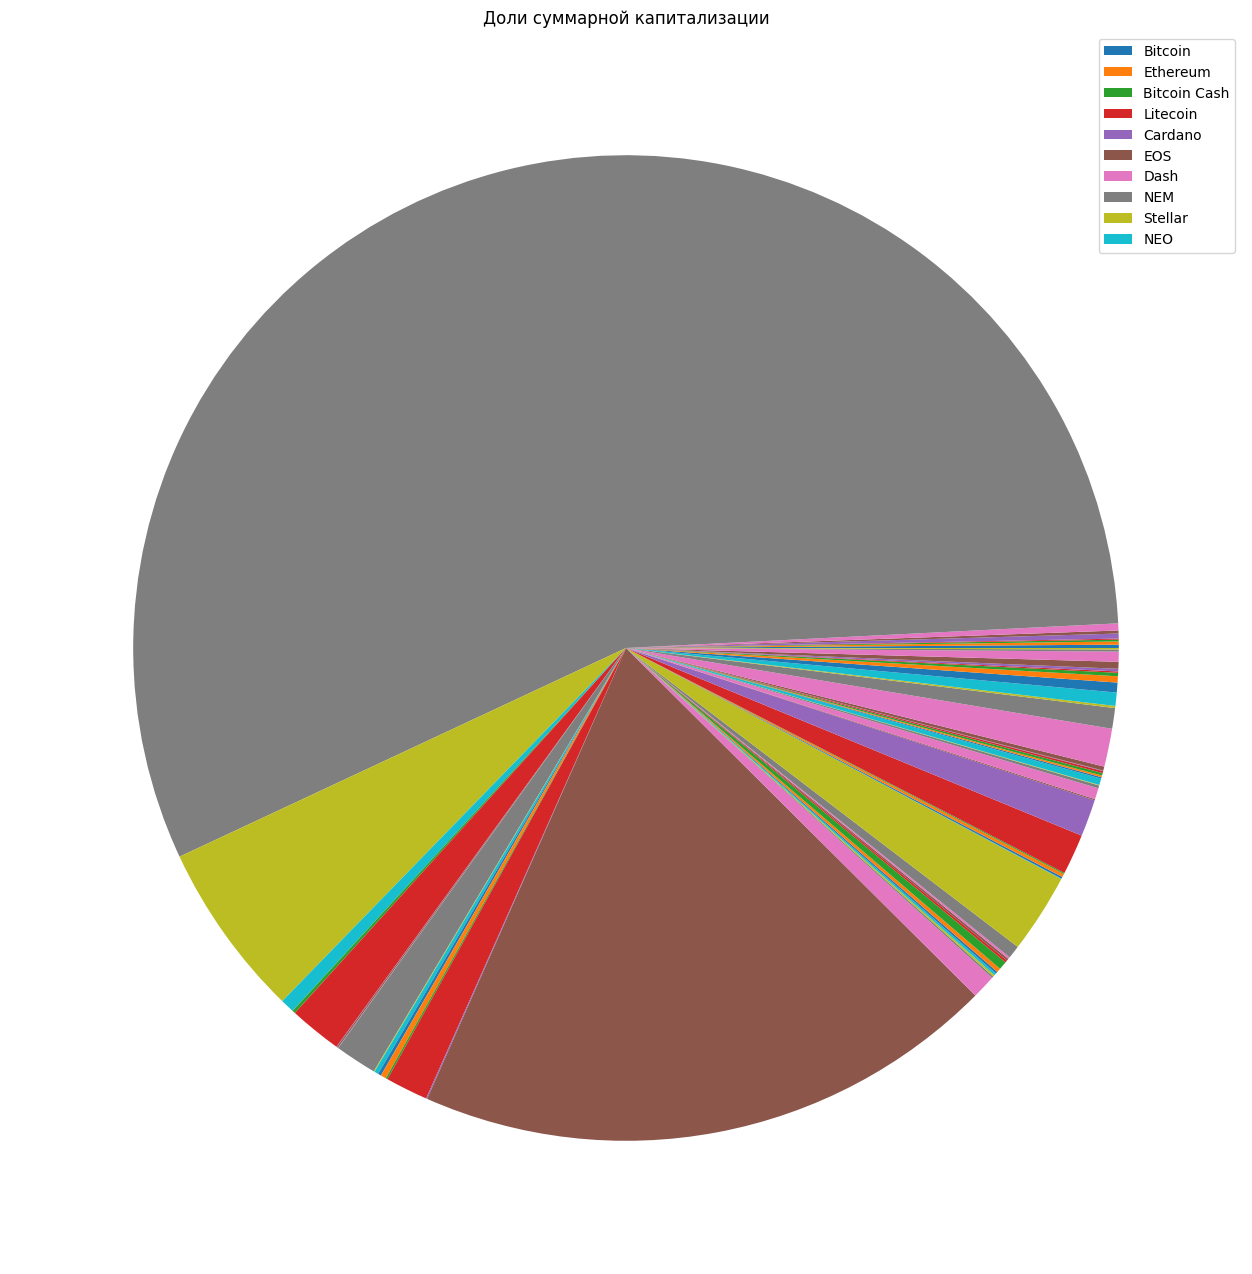

In [480]:
total_market_cap = coins.groupby('name')['market'].sum()
print(f"Монета с самой высокой суммарной капитализацией: {total_market_cap.idxmax()}")
print(f"Монета с самой низкой суммарной капитализацией: {total_market_cap.idxmin()}")
top_10_market_cap = total_market_cap.nlargest(10)
plt.figure(figsize=(16, 16))
plt.pie(total_market_cap)
plt.legend(labels=top_10_market_cap.index)
plt.title('Доли суммарной капитализации')
plt.show()

## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [481]:
import matplotlib.dates as mdates

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)].copy()
    data.sort_index(inplace=True)
    fig, ax = plt.subplots(figsize=(16, 8))
    x = mdates.date2num(data.index)
    ohlc = data[['open', 'high', 'low', 'close']].values
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [ohlc[i, 2], ohlc[i, 1]], color='black', linewidth=2)
    width = 2
    for i in range(len(x)):
        if ohlc[i, 3] >= ohlc[i, 0]:
            color = 'green'
        else:
            color = 'red'
        rect = plt.Rectangle((x[i] - width / 2, ohlc[i, 0]), width, ohlc[i, 3] - ohlc[i, 0], facecolor=color,
                             edgecolor='black')
        ax.add_patch(rect)
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена (USD)')
    ax.set_title(f'Изменение цены {symbol} с {start_date} по {end_date}')
    ax.grid(True)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.tight_layout()
    plt.show()


Посмотрим, что получилось:

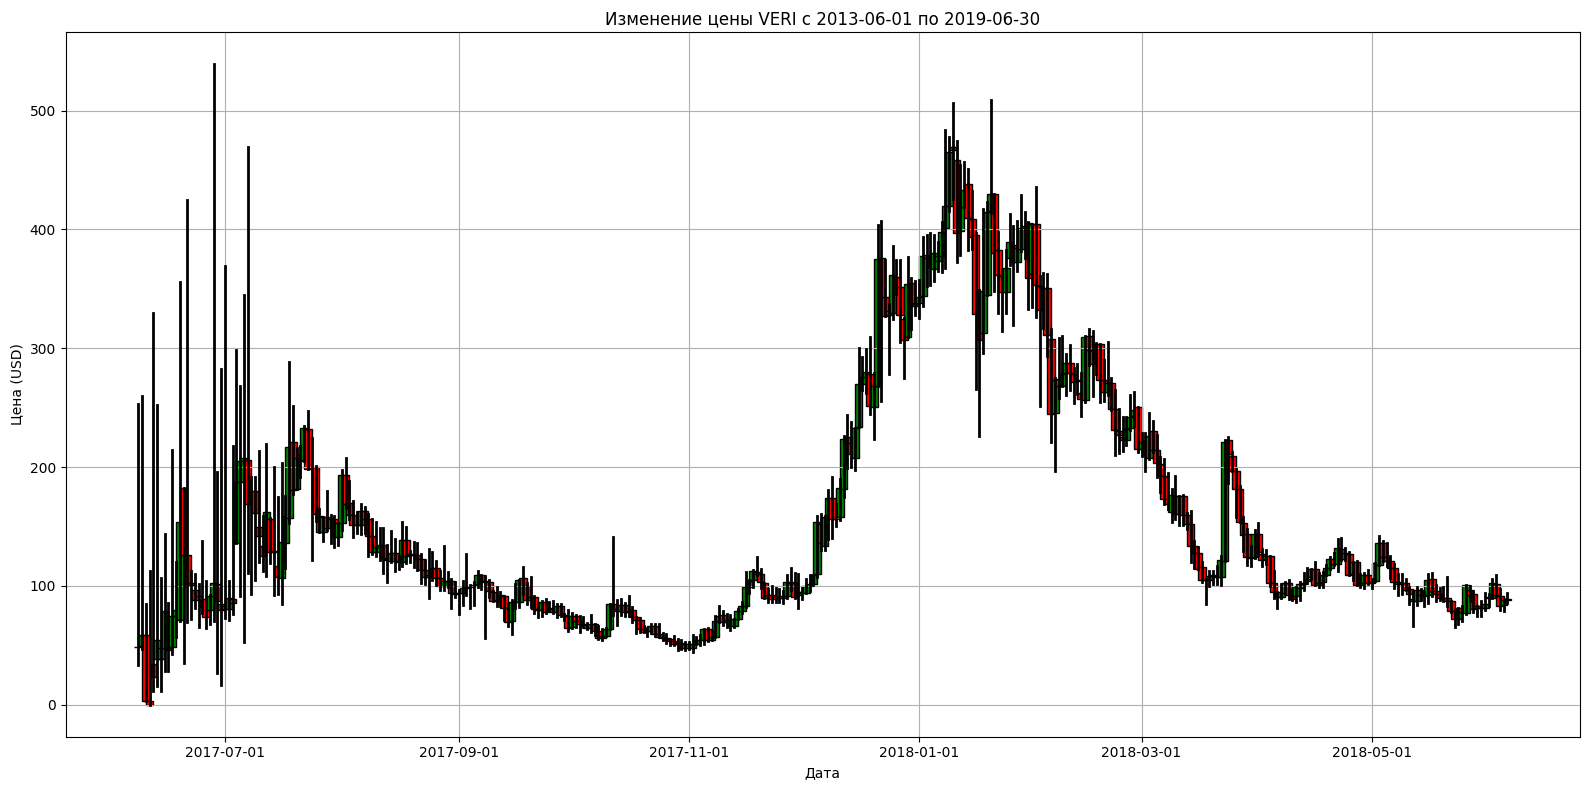

In [482]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [483]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)].copy()
    data['pnd'] = data['high'] / np.maximum(data['open'], data['close'])
    max_pnd_date = data['pnd'].idxmax()
    max_pnd_value = data['pnd'].max()
    return (max_pnd_date, str(max_pnd_value))


In [484]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', '1.1428940004366206')

#### Сравните эти значения для разных монет.

In [490]:
symbols_to_compare = ['BTC', 'ETH', 'LTC', 'VERI']
start_date_comparison = '2017-01-01'
end_date_comparison = '2018-01-01'

for symbol in symbols_to_compare:
    result = str(find_most_severe_pump_and_dump(coins, symbol, start_date_comparison, end_date_comparison))
    print(f"PUMP AND DUMP для {symbol}: {result}")

PUMP AND DUMP для BTC: ('2017-11-29', '1.1428940004366206')
PUMP AND DUMP для ETH: ('2017-05-24', '1.2016311496974479')
PUMP AND DUMP для LTC: ('2017-05-10', '1.121021021021021')
PUMP AND DUMP для VERI: ('2017-06-11', '33.549253731343285')


## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [486]:
def compute_roi(coins, investments, start_date, end_date):
    start_data = coins[coins.index == start_date].copy()
    end_data = coins[coins.index == end_date].copy()
    home = 0
    end = 0
    for symbol, investment in investments.items():
        start_price = start_data[start_data['symbol'] == symbol]['price'].values[0]
        end_price = end_data[end_data['symbol'] == symbol]['price'].values[0]
        home += investment
        end += investment * (end_price / start_price)

    if home == 0:
        return None

    roi = (end - home) / end
    print(roi)

In [487]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.03688095672251336


In [488]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

0.980873434858089
